Problem 1: Find the distribution

Assumptions:
1. Dataset represents the number of rush hour accidents under normal circumstances.
2. The dataset represents the rush hour for 11 separate days. 

   Accidents/Day  Counts of Days  Probability
0              7               1     9.090909
1              9               1     9.090909
2             11               1     9.090909
3             12               1     9.090909
4             14               2    18.181818
5             15               1     9.090909
6             16               3    27.272727
7             24               1     9.090909


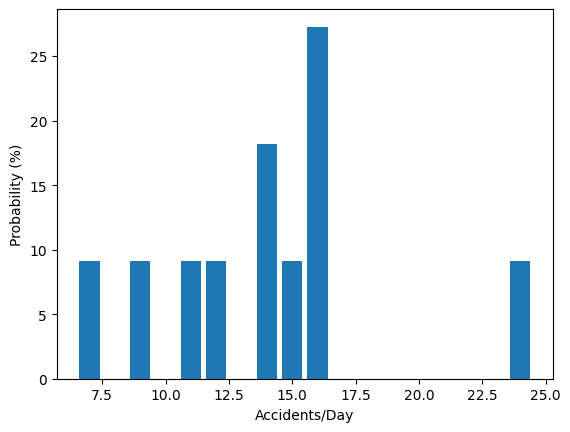

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = [16, 24, 16, 12, 16, 11, 14, 15, 9, 14, 7]

accident_series = pd.Series(dataset)
daycount = accident_series.value_counts().sort_index()
totaldays = len(dataset)
probability_day = (daycount / totaldays) * 100

table = pd.DataFrame(
    {"Accidents/Day": daycount.index,
     "Counts of Days": daycount.values,
     "Probability": probability_day
    }
).reset_index(drop=True)

print(table)

plt.bar(table["Accidents/Day"], table["Probability"])
plt.xlabel('Accidents/Day')
plt.ylabel('Probability (%)')
plt.show()


Problem 2: Find the parameters

Final mean (μ): 56.7924
Final standard deviation (σ): 10.3401


<function matplotlib.pyplot.show(close=None, block=None)>

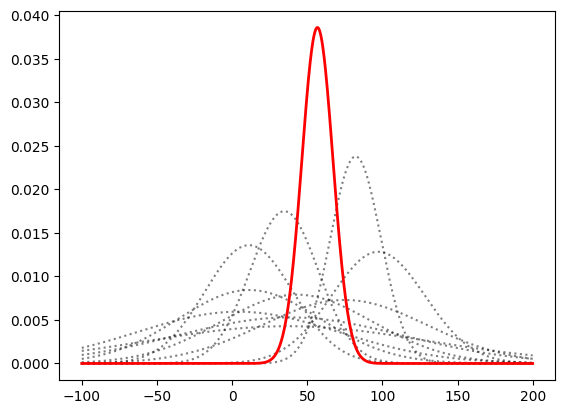

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# mu=sum(tau_i*mu_i)/sum(tau_i)
# sigma=1/sum(tau_i)
# tau=1/sigma^2

def combine_normals(mu, sigma):
    # Convert variances to precisions (tau)
    tau = 1.0 / sigma**2

    # Calculate combined precision and convert back to variance
    tau_sum = np.sum(tau)
    sigma_final = np.sqrt(1.0 / tau_sum)

    # Calculate combined mean
    mu_final = np.sum(tau * mu) / tau_sum

    return mu_final, sigma_final

# mu = np.array([mu1, mu2, ..., muN])
# sigma = np.array([sigma1, sigma2, ..., sigmaN])

# Generating random numbers for the mu and sigma array 
def random_array(m, N):
    mu = np.random.uniform(0, m, N)
    sigma = np.random.uniform(0, m, N)
    return mu, sigma

# Upper limit of the numbers
m = 100
# Number of elements in array
N = 10

# Generating x
x = np.linspace(-100, 200, 1000)

# Calling random array generator to set values as mu and sigma
mu, sigma = random_array(m, N)
# insert mu and sigma into the combining function
mu_final, sigma_final = combine_normals(mu, sigma)

print(f"Final mean (\u03BC): {mu_final:.4f}")
print(f"Final standard deviation (\u03C3): {sigma_final:.4f}")

# Graph of combined Gaussian curves
for mu_i, sigma_i in zip(mu, sigma):
    plt.plot(x, norm.pdf(x, mu_i, sigma_i), 'k:', alpha=0.5)

plt.plot(x, norm.pdf(x, mu_final, sigma_final), 'r-', lw=2)

plt.show